In [98]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline

Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

## 3 blobs far apart, equal distance.

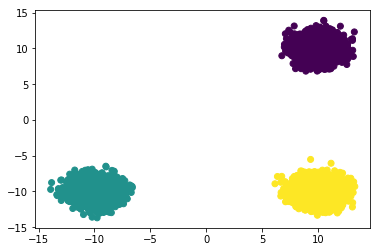

In [99]:
# The coordinates of the centers of our blobs.
centers = [[10, 10], [-10, -10], [10, -10]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-means

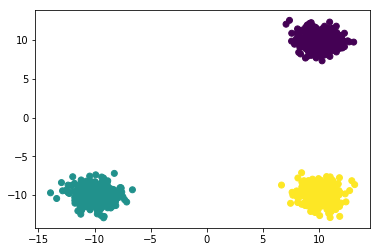

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      362    0    0
1        0  320    0
2        0    0  318
Number of estimated clusters: 4


In [100]:
from sklearn.cluster import KMeans

# Calculate predicted values.
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Graph solutions
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Crosstab for performance
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_train, y_pred))
# Count our clusters.
n_clusters = len(np.unique(y_pred))

print("Number of estimated clusters: {}".format(n_clusters))

### Mean Shift

Number of estimated clusters: 3


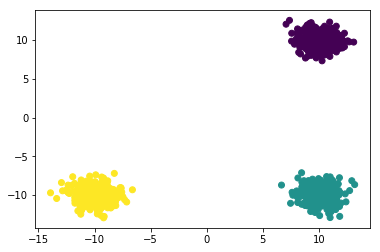

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      362    0    0
1        0    0  320
2        0  318    0


In [101]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))


### Spectral Clustering

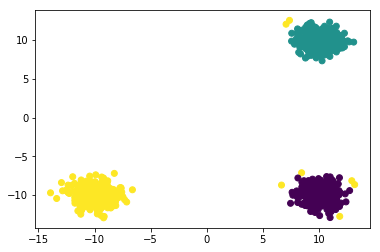

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  360    2
1        0    0  320
2      313    0    5


In [102]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

### Affinity Propogation

In [103]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 277


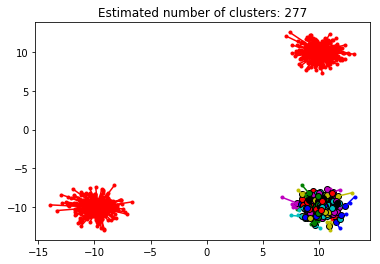

In [104]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Mean Shift and K-means both predicted the clusters perfectly with no outliers. Spectral Clustering performed okay, but had 7 outliers. Affinity propogation estimated 277 clusters , 276 of those clusters were in the same blob.

### 3 blobs difference distances

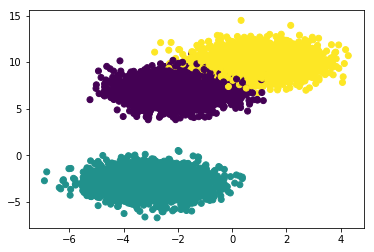

In [105]:
# The coordinates of the centers of our blobs.
centers = [[-2, 7], [-3, -3], [1, 10]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-means 

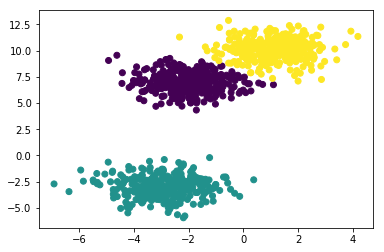

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      359    0    3
1        0  320    0
2        1    0  317
Number of estimated clusters: 277


In [106]:
from sklearn.cluster import KMeans

# Calculate predicted values.
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Graph solutions
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Crosstab for performance
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_train, y_pred))
# Count our clusters.
n_clusters = len(np.unique(y_pred))

print("Number of estimated clusters: {}".format(n_clusters))

### Mean Shift

Number of estimated clusters: 3


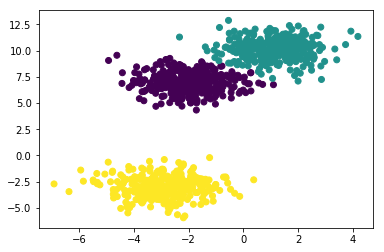

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      360    2    0
1        0    0  320
2        2  316    0


In [107]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

### Spectral Clustering

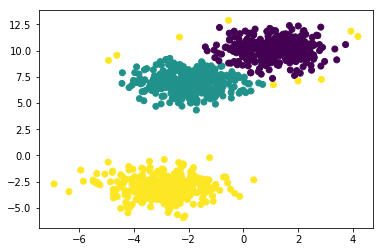

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        3  356    3
1        0    0  320
2      311    1    6


In [108]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

### Affinity Propogation

In [109]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 25


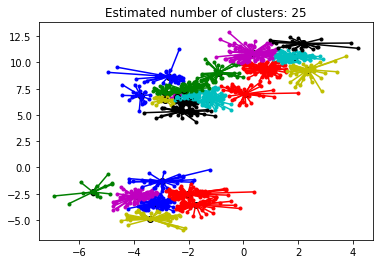

In [110]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

K-means and Mean shift still perform well, but they each have a few outliers that seem reasonable: It is confusing some points in two blobs that are right next to each other. 

Spectral clustering has low error rate, but it confuses points that belong in the upper right clusters with points in the lower left cluster. 

Affinity Propogation is tripping on acid again, but it only predicts 25 clusters instead of 270+

### 6 blobs closer together, same-ish distance

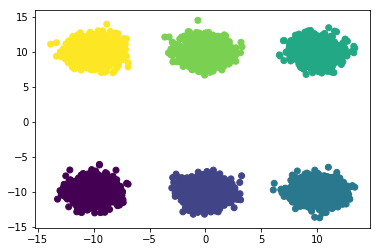

In [111]:
# The coordinates of the centers of our blobs.
centers = [[-10, -10], [0, -10], [10, -10], [10, 10], [0, 10], [-10, 10]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-means

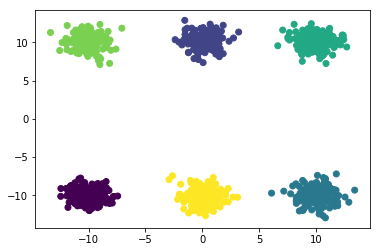

Comparing k-means clusters against the data:
col_0    0    1    2    3    4    5
row_0                              
0      176    0    0    0    0    0
1        0    0    0    0    0  186
2        0    0  151    0    0    0
3        0    0    0  169    0    0
4        0  165    0    0    0    0
5        0    0    0    0  153    0
Number of estimated clusters: 6


In [115]:
from sklearn.cluster import KMeans

# Calculate predicted values.
kmeans = KMeans(n_clusters=6, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Graph solutions
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Crosstab for performance
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_train, y_pred))
# Count our clusters.
n_clusters = len(np.unique(y_pred))

print("Number of estimated clusters: {}".format(n_clusters))

### Mean Shift

Number of estimated clusters: 4


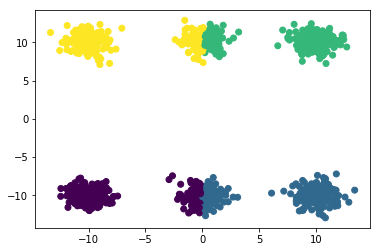

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      176    0    0    0
1       80  106    0    0
2        0  151    0    0
3        0    0  169    0
4        0    0   77   88
5        0    0    0  153


In [89]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

### Spectral Clustering

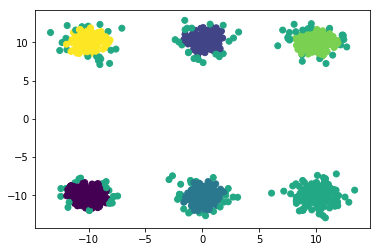

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5
row_0                              
0      155    0    0   21    0    0
1        0    0  161   25    0    0
2        0    0    0  151    0    0
3        0    0    0   26  143    0
4        0  143    0   22    0    0
5        0    0    0   21    0  132


In [116]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=6

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

### Affinity Propogation

In [ ]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

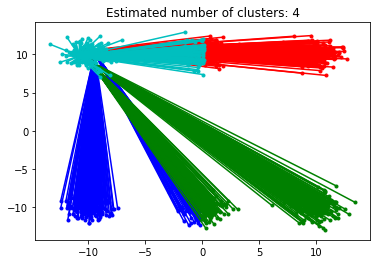

In [50]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()


K-means does very well, producing no errors. Mean Shift gets the blobs on the edges correct, but misses on the blobs in the middle.

Spectral clustering gets the centers of the blobs right, but incorrectly assigns the outer points of the lower right blob to the other blobs' edges.

Affinity propogation underestimates the number of blobs.

## Conclusion

K-means performed the best overall, performing consistently well across all of the blob layouts. It performed worst when the blobs were close together, but that's true of all of them. 

Mean Shift also peformed well, but it seems to split along planes - it struggled with 2 rows of three blobs, splitting them down the middle into 4 blobs instead of 6. 

Spectral clustering nailed the centers of the clusters, but had problems with seemingly unexplainable outliers. 

Affinity Propogation performed poorly across the board. It did nothing well. 